## Importing required models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from outlier_treatment import p_outliers, iqr_outliers

## Importing and Concatenating Train and Test Dataset using pandas.concat

In [14]:
df1 = pd.read_csv ("train.csv")
df2 = pd.read_csv ("test.csv")

In [336]:
df1.tail (3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [326]:
df2.head (3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [17]:
df = pd.concat ([df1, df2], axis = 0, ignore_index = True)

In [18]:
df.tail (5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Renaming Integer Columns

In [91]:
df = df.rename (columns = {"1stFlrSF": "First", "2ndFlrSF": "second", "3SsnPorch": "SsnPorch" })

## Dataset Observation

In [299]:
a = p_outliers (df, ["TotalBsmtSF"])
b = iqr_outliers (df, ["GarageArea"])

In [300]:
print (a)
print (b)


lower_limit: 8.85 
upper_limit: 6196.5 



lower_limit: -64.0 
upper_limit: 960.0 

Min: 0.0 
Max: 1488.0


 count    2919.000000
mean      472.736316
std       215.487407
min         0.000000
25%       320.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64



<AxesSubplot:ylabel='GarageCars'>

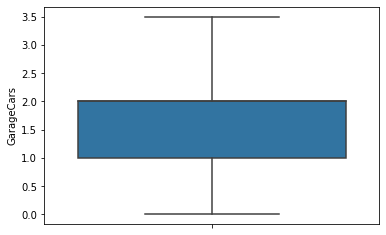

In [297]:
sns.boxplot (y = df["GarageCars"], data = df)

<AxesSubplot:>

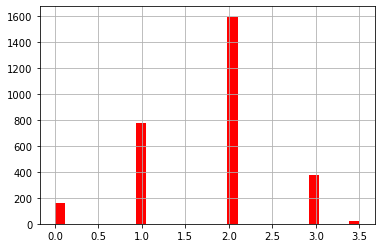

In [298]:
df["GarageCars"].hist (color = "r", bins = 30)

In [303]:
df[["RoofStyle", ]].describe ()

,RoofStyle
count,2919
unique,6
top,Gable
freq,2310


In [309]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Columns: 295 entries, Id to RoofMatl_WdShngl
dtypes: float64(18), int64(20), uint8(257)
memory usage: 1.6 MB


## Outliers Treatment

In [24]:
df.MSSubClass[(df.MSSubClass >= 145)] = 145

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3523168429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MSSubClass[(df.MSSubClass >= 145)] = 145


In [34]:
df.LotArea[(df.LotArea >= 17708)] = 17708

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/235833652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.LotArea[(df.LotArea >= 17708)] = 17708


In [42]:
df.LotArea[(df.LotArea <= 1340)] = 1340

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2711388408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.LotArea[(df.LotArea <= 1340)] = 1340


In [61]:
df.OverallQual[(df.OverallQual < 2)] = 2

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/466877044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OverallQual[(df.OverallQual < 2)] = 2


In [71]:
df.OverallCond[(df.OverallCond <= 3.5)] = 3.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/4035193824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OverallCond[(df.OverallCond <= 3.5)] = 3.5


In [74]:
df.OverallCond[(df.OverallCond >= 7.5)] = 7.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2122219866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OverallCond[(df.OverallCond >= 7.5)] = 7.5


In [102]:
df.First[(df.First >= 2154.75)] = 2154.75

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1604275773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.First[(df.First >= 2154.75)] = 2154.75


In [111]:
df.second[(df.second >= 1760)] = 1760

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2364926325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.second[(df.second >= 1760)] = 1760


In [118]:
df.LowQualFinSF[(df.LowQualFinSF > 0)] = 0

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/853646511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.LowQualFinSF[(df.LowQualFinSF > 0)] = 0


In [123]:
df.GrLivArea[(df.GrLivArea >= 2669.75)] = 2669.75

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1545821782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.GrLivArea[(df.GrLivArea >= 2669.75)] = 2669.75


In [130]:
df.FullBath[(df.FullBath > 3.5)] = 3.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/330123213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.FullBath[(df.FullBath > 3.5)] = 3.5


In [139]:
df.BedroomAbvGr[(df.BedroomAbvGr >= 4.5)] = 4.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3598121882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BedroomAbvGr[(df.BedroomAbvGr >= 4.5)] = 4.5


In [141]:
df.BedroomAbvGr[(df.BedroomAbvGr <= 0.5)] = 0.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1067153179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BedroomAbvGr[(df.BedroomAbvGr <= 0.5)] = 0.5


In [148]:
df.KitchenAbvGr[(df.KitchenAbvGr > 1) | (df.KitchenAbvGr < 1)] = 1

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1468046398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.KitchenAbvGr[(df.KitchenAbvGr > 1) | (df.KitchenAbvGr < 1)] = 1


In [153]:
df.TotRmsAbvGrd[(df.TotRmsAbvGrd >= 10)] = 10

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3444644184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotRmsAbvGrd[(df.TotRmsAbvGrd >= 10)] = 10


In [161]:
df.Fireplaces[(df.Fireplaces >= 2.5)] = 2.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2378279366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fireplaces[(df.Fireplaces >= 2.5)] = 2.5


In [172]:
df.WoodDeckSF[(df.WoodDeckSF >= 420)] = 420

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3600039170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.WoodDeckSF[(df.WoodDeckSF >= 420)] = 420


In [179]:
df.OpenPorchSF[(df.OpenPorchSF >= 175)] = 175

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2923763091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.OpenPorchSF[(df.OpenPorchSF >= 175)] = 175


In [188]:
df.EnclosedPorch[(df.EnclosedPorch > 0)] = 0

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3022415536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EnclosedPorch[(df.EnclosedPorch > 0)] = 0


In [194]:
df.SsnPorch[(df.SsnPorch > 0)] = 0

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3916739450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SsnPorch[(df.SsnPorch > 0)] = 0


In [199]:
df.ScreenPorch[(df.ScreenPorch > 0)] = 0

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3312408753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ScreenPorch[(df.ScreenPorch > 0)] = 0


In [205]:
df.PoolArea[(df.PoolArea > 0)] = 0

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2067872804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.PoolArea[(df.PoolArea > 0)] = 0


In [210]:
df.MiscVal[(df.MiscVal > 0)] = 0

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/120786236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MiscVal[(df.MiscVal > 0)] = 0


In [233]:
df.LotFrontage[(df.LotFrontage <= 33)] = 33

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2445647747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.LotFrontage[(df.LotFrontage <= 33)] = 33


In [235]:
df.LotFrontage[(df.LotFrontage >= 105)] = 105

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1039444811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.LotFrontage[(df.LotFrontage >= 105)] = 105


In [242]:
df.MasVnrArea[(df.MasVnrArea > 408.75)] = 408.75

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1988399025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.MasVnrArea[(df.MasVnrArea > 408.75)] = 408.75


In [250]:
df.BsmtFinSF1[(df.BsmtFinSF1 >= 1832.5)] = 1832.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/371088515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BsmtFinSF1[(df.BsmtFinSF1 >= 1832.5)] = 1832.5


In [258]:
df.BsmtFinSF2[(df.BsmtFinSF2 > 0)] = 0

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/291818227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BsmtFinSF2[(df.BsmtFinSF2 > 0)] = 0


In [263]:
df.BsmtUnfSF[(df.BsmtUnfSF >= 1682.5)] = 1682.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/4236613430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BsmtUnfSF[(df.BsmtUnfSF >= 1682.5)] = 1682.5


In [268]:
df.TotalBsmtSF[(df.TotalBsmtSF <= 29.5)] = 29.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1224662563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalBsmtSF[(df.TotalBsmtSF <= 29.5)] = 29.5


In [270]:
df.TotalBsmtSF[(df.TotalBsmtSF >= 2065.5)] = 2065.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2061970555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalBsmtSF[(df.TotalBsmtSF >= 2065.5)] = 2065.5


In [275]:
df.BsmtFullBath[(df.BsmtFullBath >= 2.5)] = 2.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/201086649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BsmtFullBath[(df.BsmtFullBath >= 2.5)] = 2.5


In [280]:
df.BsmtHalfBath[(df.BsmtHalfBath > 0)] = 0

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1405708008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.BsmtHalfBath[(df.BsmtHalfBath > 0)] = 0


In [287]:
df.GarageYrBlt[(df.GarageYrBlt <= 1891)] = 1891

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/2720191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.GarageYrBlt[(df.GarageYrBlt <= 1891)] = 1891


In [289]:
df.GarageYrBlt[(df.GarageYrBlt >= 2067)] = 2067

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3534068209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.GarageYrBlt[(df.GarageYrBlt >= 2067)] = 2067


In [296]:
df.GarageCars[(df.GarageCars >= 3.5)] = 3.5

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/1164203768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.GarageCars[(df.GarageCars >= 3.5)] = 3.5


In [302]:
df.GarageArea[(df.GarageArea >= 960)] = 960

C:\Users\USER\AppData\Local\Temp/ipykernel_6276/3254987466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.GarageArea[(df.GarageArea >= 960)] = 960


## Handling Categorical missing values Using Sklearn.impute.SimpleImputer

In [223]:
from sklearn.impute import SimpleImputer

In [224]:
imp = SimpleImputer (missing_values = np.NaN, strategy = "most_frequent", fill_value = "constant" )

In [225]:
df["MSZoning"] = imp.fit_transform (df[["MSZoning"]])
df["Utilities"] = imp.transform (df[["Utilities"]])
df["Exterior1st"] = imp.transform (df[["Exterior1st"]])
df["Exterior2nd"] = imp.transform (df[["Exterior2nd"]])
df["MasVnrType"] = imp.transform (df[["MasVnrType"]])
df["BsmtQual"] = imp.transform (df[["BsmtQual"]])
df["BsmtCond"] = imp.transform (df[["BsmtCond"]])
df["BsmtExposure"] = imp.transform (df[["BsmtExposure"]])
df["BsmtFinType1"] = imp.transform (df[["BsmtFinType1"]])
df["BsmtFinType2"] = imp.transform (df[["BsmtFinType2"]])
df["KitchenQual"] = imp.transform (df[["KitchenQual"]])
df["Functional"] = imp.transform (df[["Functional"]])
df["FireplaceQu"] = imp.transform (df[["FireplaceQu"]])
df["GarageType"] = imp.transform (df[["GarageType"]])
df["GarageFinish"] = imp.transform (df[["GarageFinish"]])
df["GarageQual"] = imp.transform (df[["GarageCond"]])
df["SaleType"] = imp.transform (df[["SaleType"]])
df["GarageCond"] = imp.transform (df[["GarageCond"]])
df["Electrical"] = imp.transform (df[["Electrical"]])

## Handling integer missing values using sklearn.impute.SimpleImputer

In [226]:
imp = SimpleImputer (missing_values = np.NaN, strategy = "mean", fill_value = "constant" )

In [290]:
df["LotFrontage"] = imp.fit_transform (df[["LotFrontage"]])
df["MasVnrArea"] = imp.transform (df[["MasVnrArea"]])
df["BsmtFinSF1"] = imp.transform (df[["BsmtFinSF1"]])
df["BsmtFinSF2"] = imp.transform (df[["BsmtFinSF2"]])
df["BsmtUnfSF"] =imp.transform (df[["BsmtUnfSF"]])
df["TotalBsmtSF"] = imp.transform (df[["TotalBsmtSF"]])
df["BsmtFullBath"] =imp.transform (df[["BsmtFullBath"]])
df["BsmtHalfBath"] = imp.transform (df[["BsmtHalfBath"]])
df["GarageYrBlt"] = imp.transform (df[["GarageYrBlt"]])
df["GarageCars"] = imp.transform (df[["GarageCars"]])
df["GarageArea"] = imp.transform (df[["GarageArea"]])


## Handling Categorical Data Using pandas.get_dummies

In [304]:
df = pd.get_dummies (df, columns = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", 
                                    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
                                    "Exterior1st", "Exterior2nd", "ExterQual", "ExterCond", "Foundation", "Heating",
                                    "HeatingQC", "CentralAir", "KitchenQual", "Functional", "PavedDrive", "SaleType",
                                    "SaleCondition", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                                    "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual",
                                    "GarageCond", "RoofMatl"])

## Deleting unwanted columns

In [308]:
del df["Alley"]
del df["PoolQC"]
del df["Fence"]
del df["MiscFeature"]

## Splitting Dataset

In [337]:
df_Train = df.iloc[0: 1460, :]

In [338]:
df_Test = df.iloc[1460: , :]

In [345]:
del df_Test["SalePrice"]

## Splitting and Standardizing Dataset

In [368]:
x = df_Train.drop ("SalePrice", axis = 1)
y = df_Train["SalePrice"]

In [369]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.8, random_state = 42)

In [370]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
x_train_s = scaler.fit_transform (x_train)
x_test_s = scaler.transform (x_test)

# Modeling

## LinearRegression model

In [371]:
from sklearn.linear_model import LinearRegression
model = LinearRegression ()
model.fit (x_train_s, y_train)

LinearRegression()

In [372]:
from sklearn.metrics import r2_score
r2_score (y_test, model.predict (x_test_s))

-4.836706020650267e+22

## Ridge model

In [351]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
model = Ridge ()
alpha = np.logspace (-1, 4, 6000)
params = {"alpha": alpha}
grid = GridSearchCV (model, params, n_jobs = -1, cv = 5, scoring = "r2")
grid.fit (x_train_s, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-01, 1.00192098e-01, 1.00384566e-01, ...,
       9.96169075e+03, 9.98082700e+03, 1.00000000e+04])},
             scoring='r2')

In [355]:
print ("best parameters are: {} ".format (grid.best_params_))
best_ridge = grid.best_estimator_
y_pred = best_ridge.predict (x_test_s)
score = r2_score (y_test, y_pred) * 100
print ("Accuracy is {} %".format (np.round (score, 2)))

best parameters are: {'alpha': 360.1024457348948} 
Accuracy is 87.68 %


### Saving ridge model using Joblib

In [356]:
import joblib as jlb

In [357]:
jlb.dump (best_ridge, "Best Ridge.sav")

['Best Ridge.sav']

### Loading saved Ridge model

In [359]:
best_model = jlb.load ("Best Ridge.sav")
r2_score (y_test, best_model.predict (x_test_s))

0.8767991767054778

## LogisticRegression model

In [361]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression ()
model.fit (x_train_s, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [362]:
r2_score (y_test, model.predict (x_test_s))

0.545526957506502

### Saving model using joblib

In [363]:
jlb.dump (model, "LogisticRegression.sav")

['LogisticRegression.sav']

# PREDICTIONS ON TEST DATASET

## splitting and standardizing dataset

In [374]:
x_train = df_Train.drop ("SalePrice", axis = 1)
y_train = df_Train["SalePrice"]
x_test = df_Test

In [375]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
x_train_s = scaler.fit_transform (x_train)
x_test_s = scaler.transform (x_test)

## Predictions using Ridge model

In [376]:
model = Ridge ()
alpha = np.logspace (-1, 4, 6000)
params = {"alpha": alpha}
grid = GridSearchCV (model, params, n_jobs = -1, cv = 5, scoring = "r2")
grid.fit (x_train_s, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-01, 1.00192098e-01, 1.00384566e-01, ...,
       9.96169075e+03, 9.98082700e+03, 1.00000000e+04])},
             scoring='r2')

In [378]:
print ("best parameters are: {} ".format (grid.best_params_))
best_ridge = grid.best_estimator_

best parameters are: {'alpha': 360.1024457348948} 


### Saving our fully trained model using joblib

In [379]:
jlb.dump (best_ridge, "Best Ridge.sav")

['Best Ridge.sav']

### Loading our fully trained model to make predictions

In [385]:
best_model = jlb.load ("Best Ridge.sav")
y_pred = best_model.predict (x_test_s)

In [386]:
for a in y_pred:
    print (a)

114074.18196127815
165380.57702687575
188826.50140921373
197925.08447562627
198082.3432956254
169171.8639094889
176898.92608072274
160598.43609357908
197981.65967265336
113389.10019868176
171629.57678641938
95954.70890932193
93922.7260407737
144240.89571499123
94574.80298356764
373722.75168557715
252047.33190820072
302876.62871079537
310845.4684518773
438416.36383173306
321218.2214322642
208425.29634258128
181605.34838337035
163968.9668533915
187299.1177407311
195415.63891081914
344714.12901433965
222897.24990017858
202945.4196140974
249318.46367408716
199261.6923547607
91964.34642369223
201640.89687497076
319617.39921517135
295678.65453650744
245339.7995986499
169072.0961545435
173572.45374932824
170767.08772325492
158483.85437443038
177924.05553652457
144606.06758222304
282050.0228778773
234479.71314228477
226541.38902432006
195421.87796261092
246175.14011537918
208754.2873823857
154988.74294343818
151633.8952207118
157232.11441873707
175240.33748829146
137451.30490923542
183187.5003